<a href="https://colab.research.google.com/github/ev1025/1day1commit/blob/main/%EC%BD%94%EB%93%9C%EC%8A%A4%ED%85%8C%EC%9D%B4%EC%B8%A0/%EB%94%A5%EB%9F%AC%EB%8B%9D/Section4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section4 Sprint1

## Note1 퍼셉트론(Perceptron)과 인공신경망(Artificial Neural Networks)

## 퍼셉트론

- 인공신경망을 이루는 가장 기본 단위, 다수의 신호를 입력받아 하나의 신호를 출력하는 구조


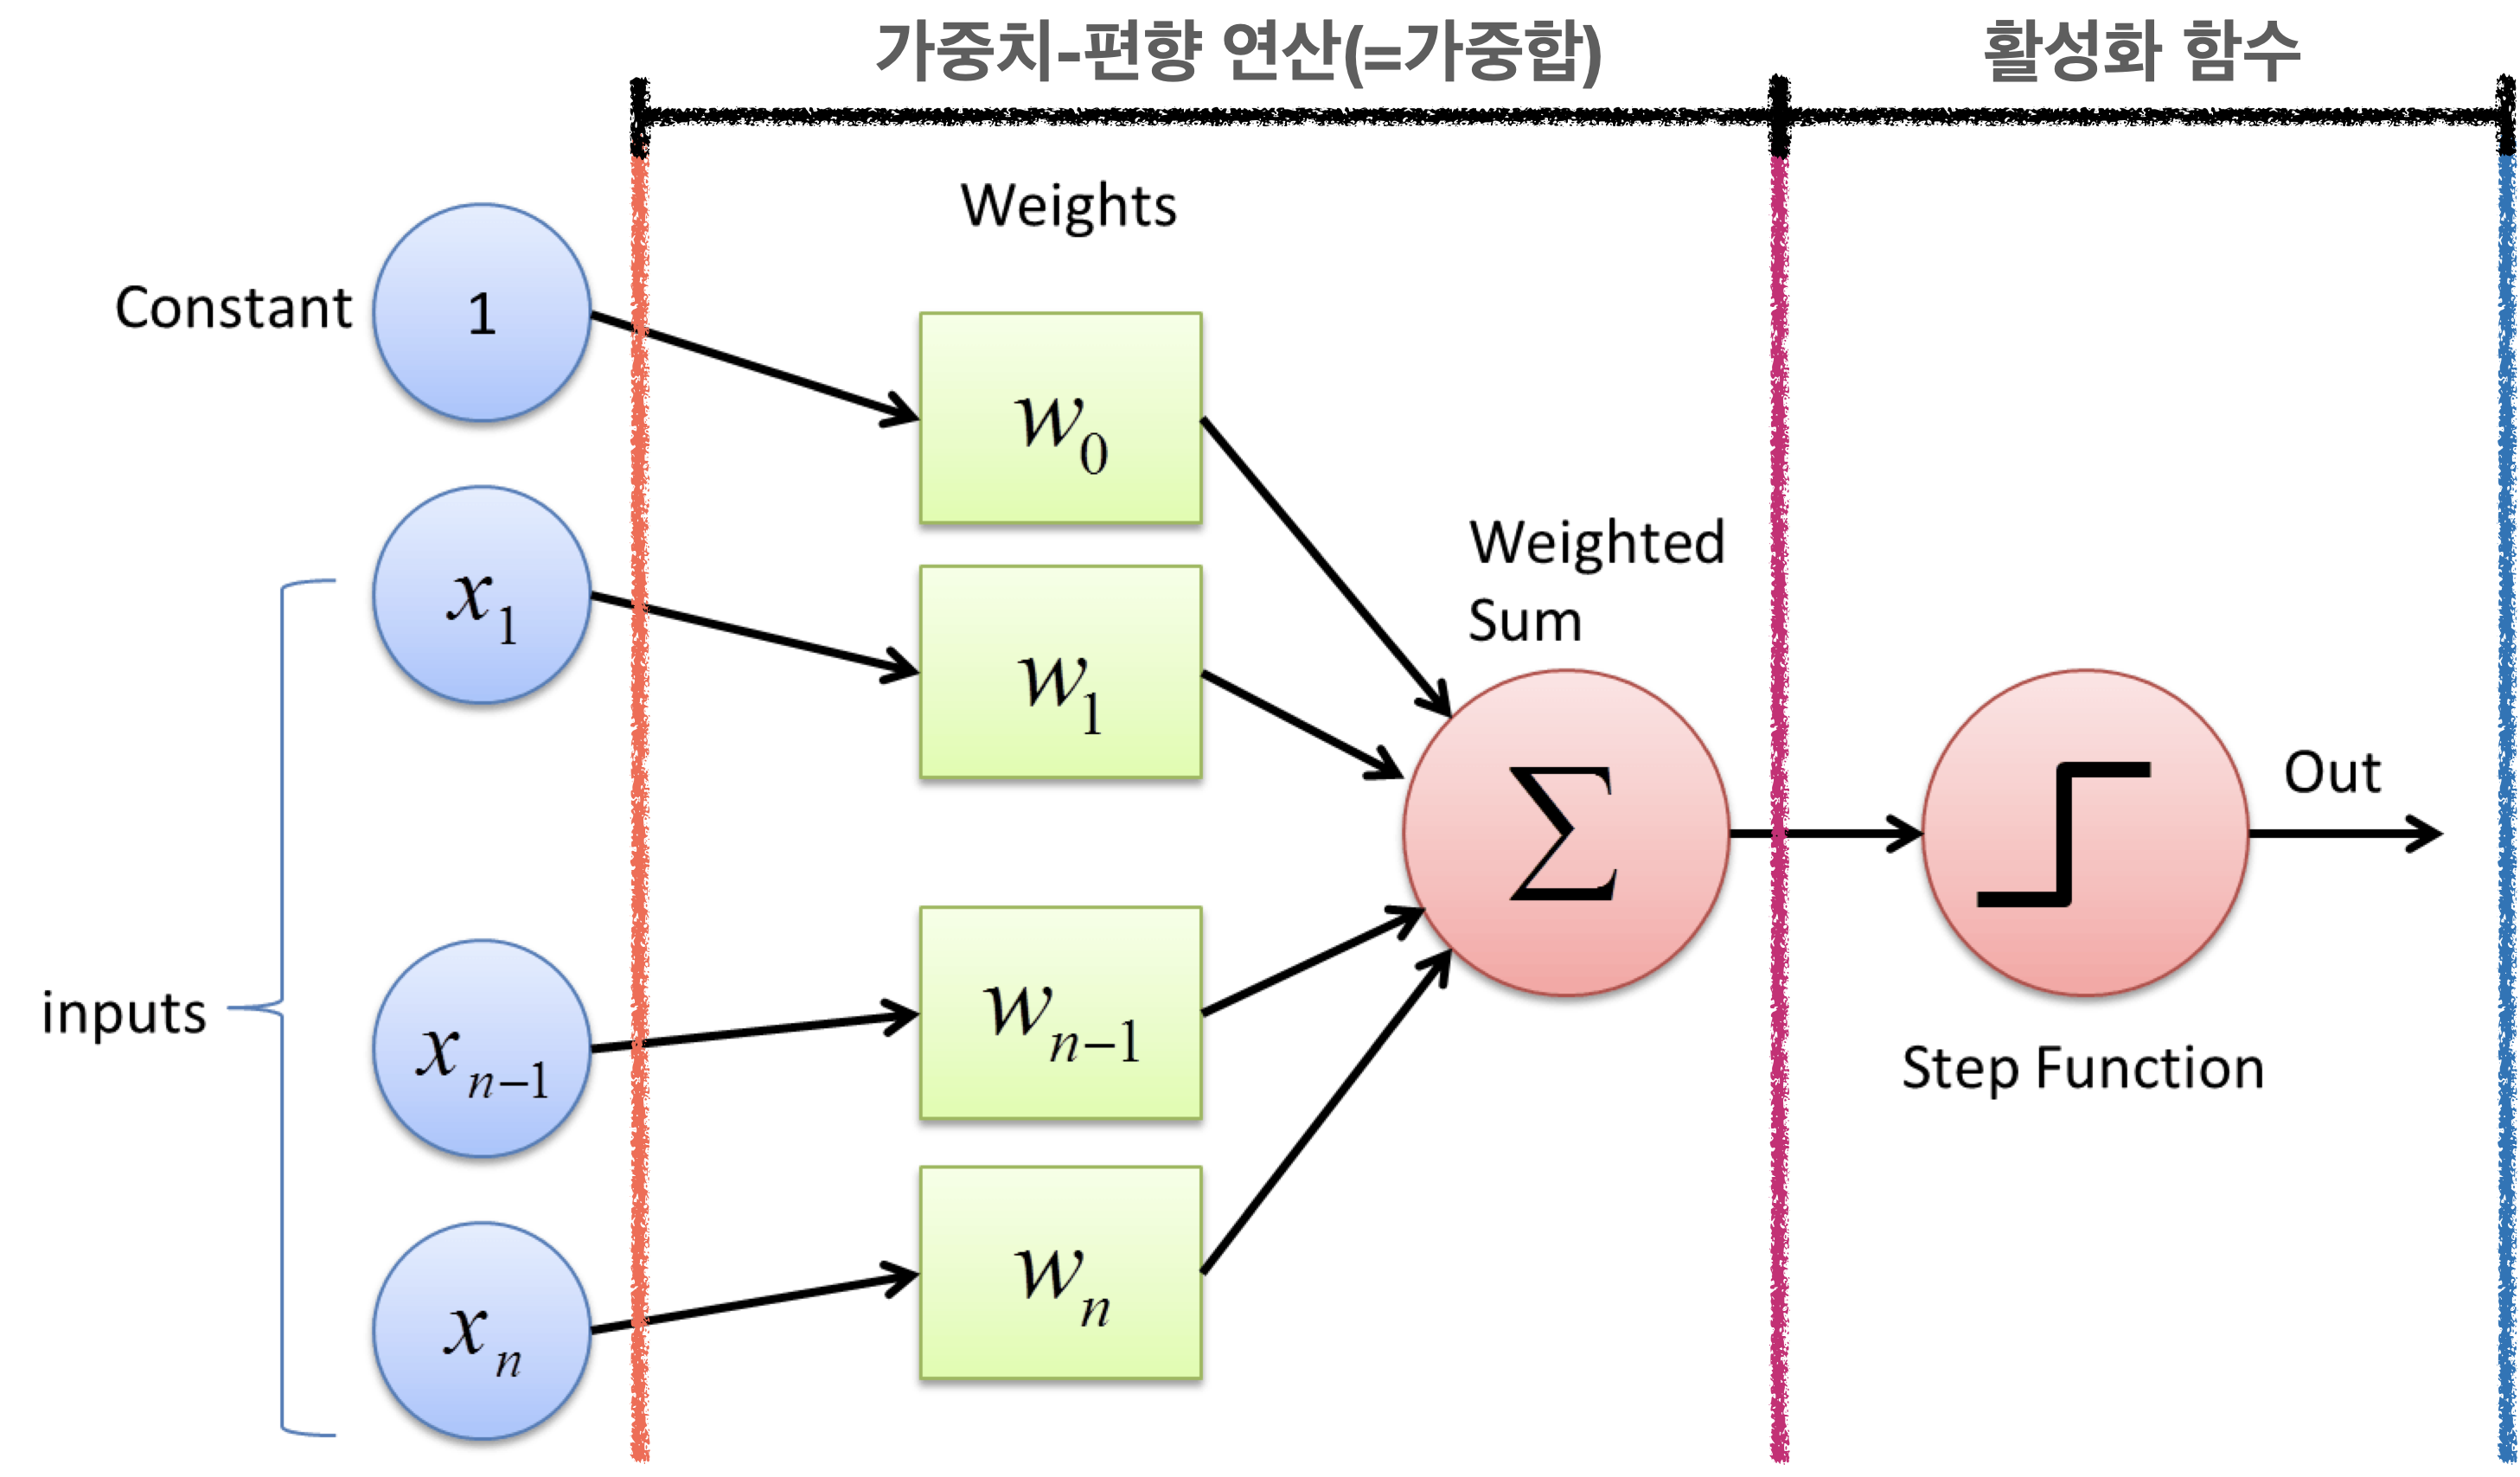

1. 가중치(Weight)-편향(bias) 연산
   - 입력값에 가중치를 곱하여 모델을 훈련
   - x = 입력값(input), w = 가중치(Weight)
   - (x1*w1)+(xn-1*wn-1)+(xn*wn) = 가중합(Weighted Sum)
   - Constant는 편향(bias)값으로 건드리지 않음
2. 활성화함수(Activation function)
   - 가중합을 얼마만큼의 신호로 출력할 지 결정
   - 은닉층, 출력층에 사용

### 계단함수(Step function)
- 임계값을 넘기면 1을 임계값보다 낮으면 0을 출력하는 함수(많이 사용되지 않음)   
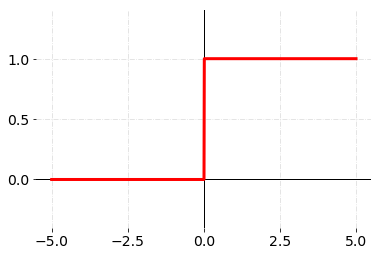

### 시그모이드 함수(Sigmoid function)
- 모든 실수 입력값을 0보다 크고 1 보다 작은 미분 가능한 수로 변환(임계값에선 미분의 기울기가 0이 되어 미분
- 딥러닝에서는 노드에 임계값을 넘을 때만 출력하는 활성함수로 사용
- 음수 값을 0에 가깝게 표현하여 입력값이 최종계층에 미치는 영향이 적어지는 Vanishing gradient(기울기 감소)가 발생
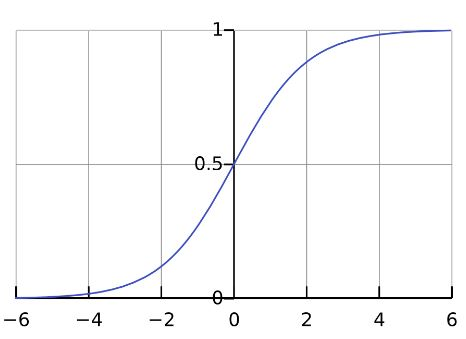

### ReLU함수(ReLU function)
- 양의 값이 입력되면 그대로 출력하고, 음의 값이 입력되면 0을 반환하는 함수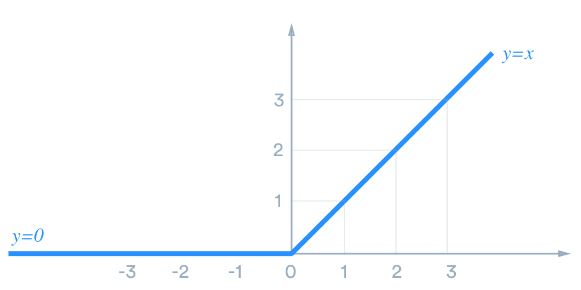

### 소프트맥스 함수(Softmax function)
- 다중분류에 적용할 수 있도록 시그모이드 함수를 일반화
- 가중합을 함수에 통과시키면 모든 클래스의 합이 1이 되는 확률로 변환  
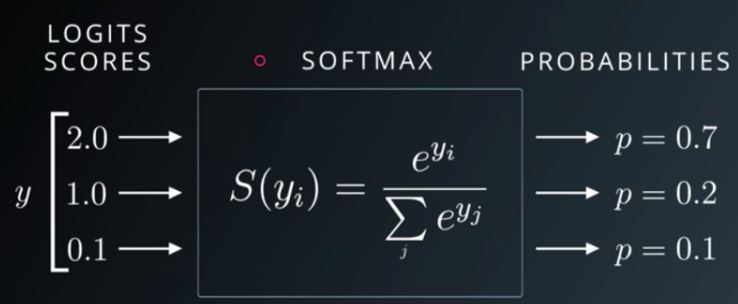


### **논리게이트**
1. AND GATE
   - 입력신호가 모두 True(1)일 때  True(1) 출력  
   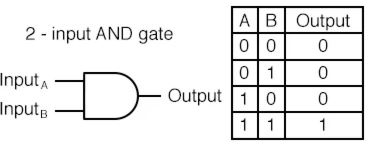 
2. NAND GATE
   - 입력신호가 모두 True(1)일 때 False(0) 출력   
   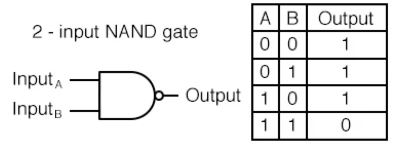

3. OR GATE
   - 입력 신호 중 하나만 True(1)라도 True(1)을 출력    
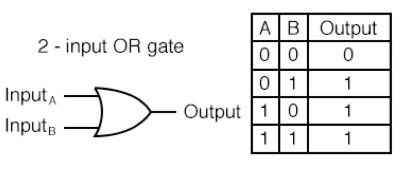
4. XOR GATE
   - 입력 신호가 다를 경우 True(1)을 출력
   - 배타적 논리합(Exclusive-OR)이라고 불림   
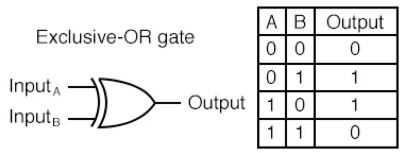

## 인공신경망(Artificial Neural Networks, ANN)

- 실제 신경계를 모사하여 만들어진 계산모델(=Neural-Net)
- 다층 퍼셉트론 신경망(Multi-Layer Perceptron, MLP) : 퍼셉트론을 여러층으로 쌓아 구축한 신경망
- 단층에서 해결 할 수 없었던 문제를 2개 이상의 층으로 구성하면 해결      
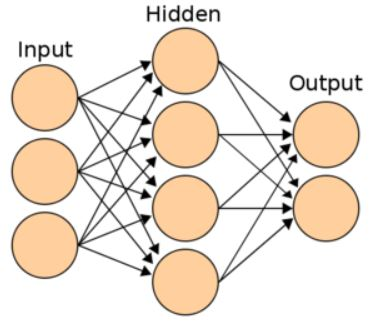

- **입력층(input Layer)**
   - 데이터셋이 입력되는 층(특성의 개수= 노드의 개수)
   - 값들을 전달하는 역할만 하기 때문에 신경망의 층수에 포함되지 않음
- **은닉층(Hidden Layers)**
   - 입력층에서 들어온 데이터에 편향과 가중치를 부여하고 연산
   - 계산 과정을 사용자가 볼 수 없기 때문에 은닉층이라 한다.
   - 2개 이상의 은닉층을 가진 신경망을 딥러닝(Deep Learning)이라고 한다.
- **출력층(Output Layer)**
   - 은닉층의 연산값이 출력되는 층
   - 이진분류 : Sigmoid함수를 사용하며 노드 수를 1로 지정
   - 다중분류 : Softmax함수를 사용하며 노드 수는 레이블의 클래스 수(예측하고자 타겟의 수)와 동일
   - 회귀 : 일반적으로 활성화함수를 지정해주지 않는다, (출력층의 수 = 특성의 수)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

# 시드고정
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
!pip install xlrd==2.0.1 # 코랩에서 안되서 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 데이터 불러오고, 전처리(특성,타겟 데이터 분류)
df = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/MouseProtein/mouse_protein_X.xls", header=None)
df_label = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/MouseProtein/mouse_protein_label.xls", header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,0.50364,0.74719,0.43018,2.8163,5.9902,0.21883,0.17757,2.3737,0.23222,1.7509,...,0.14276,0.43096,0.24754,1.6033,2.0149,0.10823,1.04500,0.83156,0.18885,1.6757
1,0.51462,0.68906,0.41177,2.7895,5.6850,0.21164,0.17282,2.2921,0.22697,1.5964,...,0.14204,0.45716,0.25763,1.6717,2.0046,0.10975,1.00990,0.84927,0.20040,1.7436
2,0.50918,0.73025,0.41831,2.6872,5.6221,0.20901,0.17572,2.2833,0.23025,1.5613,...,0.14244,0.51047,0.25534,1.6635,2.0168,0.10820,0.99685,0.84671,0.19368,1.9264
3,0.44211,0.61708,0.35863,2.4669,4.9795,0.22289,0.17646,2.1523,0.20700,1.5951,...,0.14507,0.43100,0.25110,1.4846,1.9572,0.11988,0.99022,0.83328,0.19211,1.7006
4,0.43494,0.61743,0.35880,2.3658,4.7187,0.21311,0.17363,2.1340,0.19216,1.5042,...,0.14087,0.48123,0.25177,1.5348,2.0091,0.11952,0.99777,0.87867,0.20560,1.8397


In [ ]:
df.shape

(1077, 69)

In [ ]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
64    0
65    0
66    0
67    0
68    0
Length: 69, dtype: int64

In [ ]:
# 시그모이드 함수를 이용하므로 1,2를 0, 1로 변환해줌
label_sig = np.where(df_label==1,0,1)
label_sig

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
# 다차원을을 1차원 배열로 만듬
label = label_sig.ravel()
label
# label.flatten()
# label.reshape(-1)

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.2, random_state=42)

In [ ]:
# 모델구축
import tensorflow as tf

model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.flatten(input_shpae=(n, n)) 입력층 특성이 다차원 배열일 때(입력노드 개수 = 특성개수)
# model.add(tf.keras.layers.Dense(100, activation='relu') 은닉층 (은닉층의 노드 개수는 자유롭게 설정(100))
model.add(tf.keras.layers.Dense(1,activation='sigmoid')) # 출력층

# model = tf.kears.models.Sequential([
#     tf.keras.layers.flatten(input_shape=(n, n)),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

In [ ]:
# 모델평가사항을 선택
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
 # 모델 훈련(epochs=학습횟수)
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
27/27 [==============================] - 0s 2ms/step - loss: 0.8583 - accuracy: 0.4425
Epoch 2/30
27/27 [==============================] - 0s 2ms/step - loss: 0.7189 - accuracy: 0.4355
Epoch 3/30
27/27 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.4599
Epoch 4/30
27/27 [==============================] - 0s 3ms/step - loss: 0.7094 - accuracy: 0.4797
Epoch 5/30
27/27 [==============================] - 0s 2ms/step - loss: 0.7043 - accuracy: 0.4878
Epoch 6/30
27/27 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.4878
Epoch 7/30
27/27 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5319
Epoch 8/30
27/27 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5366
Epoch 9/30
27/27 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5587
Epoch 10/30
27/27 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5575
Epoch 11/30
27/27 [

In [ ]:
# compile기반으로 모델 평가
model.evaluate(X_test, y_test, verbose=2)

7/7 - 0s - loss: 0.6252 - accuracy: 0.6620 - 121ms/epoch - 17ms/step


[0.6251574158668518, 0.6620370149612427]

In [ ]:
# 모델의 예측값을 직접 구해서 분류평가지표를 확인해볼 수 있음
y_pred = model.predict(X_test)
y_pred_wh = np.where(y_pred > 0.5, 1, 0)

7/7 [==============================] - 0s 3ms/step


In [ ]:
# 분류평가지표 확인
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_wh))

              precision    recall  f1-score   support

           0       0.64      0.87      0.74       119
           1       0.72      0.40      0.52        97

    accuracy                           0.66       216
   macro avg       0.68      0.64      0.63       216
weighted avg       0.68      0.66      0.64       216



### 손글씨 MINIST 예제
- 0~9까지 10개의 손글씨, 각 이미지를 클래스로 분류(10개)
- 가로,세로 28픽셀(하나의 Input당 28x28의 행렬)
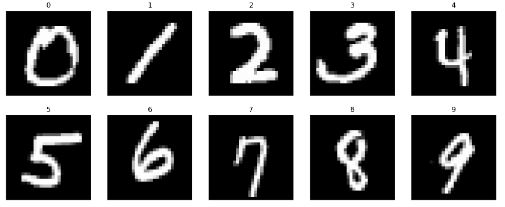

In [ ]:
import pandas as pd
import tensorflow as tf

In [ ]:
# 데이터셋불러오기
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# 정규화 : 1픽셀당 255바이트로 나눔(부하를 줄이기 위해서 특성값을 정규화)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # 입력층 : Flatten으로 2차원(28행,28열)=>1차원(784열) 변환
model.add(tf.keras.layers.Dense(100, activation='relu')) # 은닉층 : 노드 수 자유롭게 조절
model.add(tf.keras.layers.Dense(10, activation='softmax'))# 출력층 : 분류할 클래스가 10개 이므로 노드 수도 10개

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(100, activation='relu'),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2792 - accuracy: 0.9208
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1283 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0891 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0671 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0529 - accuracy: 0.9839


In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0810 - accuracy: 0.9758 - 705ms/epoch - 2ms/step


[0.08102457225322723, 0.9757999777793884]

## N412 신경망 학습(Training Neural Network)

**신경망 학습 순서**
1. 데이터가 입력층을 통해 입력되면 각 층에서 가중치와 활성화 함수 연산을 반복 수행
2. 출력층에서 계산된 값을 출력
3. 손실함수를 사용하여 예측값(y_pred)과 실제값(y_true)의 차이를 계산
4. 경사하강법과 역전파를 통해서 각 가중치를 갱신
5. 기준을 만족할 때 까지 1-4과정 반복

### 순전파(Forward Propagation)
- 입력층에서 입력된 신호가 은닉층의 연산을 거쳐 출력층으로 값을 보내는 과정
- 전달받은 신호를 가중,편향연산 -> 연산값은 활성화 함수로 다음층에 전달

### 손실함수(Loss function)
- 신경망은 손실함수를 최소화하는 방향으로 가중치를 갱신
- 출력층을 통해 도출 된 값(y_pred)과 그 데이터의 타겟값(y_true)을 손실함수에 넣어 손실을 계산
   - 회귀 : MSE, MAE
   - 이진분류 : binary_crossentropy
   - 다중분류 : categorical_crossentropy(타겟이 원핫형태), sparse_categorical_crossentropy(타겟이 int형태)   

### 경사 하강법(Gradient Descent)
- 손실함수의 Gradient(경사)가 작아지는 방향으로 업데이트하면서 손실함수를 줄임
- 새 가중치 = (이전 가중치) - (학습률) * (갱신 전 기울기)
- 매 Iteration마다 비용함수의 도함수를 계산하여 경사가 작아지는 방향으로 가중치 변경
- 기울기가 양수일 땐 왼쪽으로, 기울기가 음수일 땐 오른쪽으로 이동

### 역전파(Backward Propagation)
- 반대방향으로 손실정보(Loss 또는 Error)를 전달해주는 과정
- 출력층부터 입력층까지 각 가중치를 얼마나 업데이트 해야할 지 알려주는 알고리즘
$$
\frac{\partial}{\partial \theta_i} J(\theta)
$$

- $\partial J(\theta)$를 $\partial \theta_i$로 편미분을 해야하는데, 계산 할 수 없기 때문에 Chain rule(연쇄법칙)을 적용하여 해결
$$
\frac{\partial J(\theta)}{\partial \theta_i} = \frac{\partial J(\theta)}{\partial \theta_x} \cdot \frac{\partial \theta_x}{\partial \theta_i} = \frac{\partial J(\theta)}{\partial \theta_x} \cdot \frac{\partial \theta_x}{\partial \theta_y} \cdot \frac{\partial \theta_y}{\partial \theta_i}
$$

### Compile : 모델의 학습방식에 대한 환경설정
- **정규화기 (optimizer)** : 경사하강 방법을 결정하는 파라미터
   - `GD` : iteration 1회당 모든 자료를 검토하는 방법
   - `SGD` : iteration 1회당 모든 자료 중 1개의 데이터만 검토하는 방법(확률적 경사하강법)
   - `Mini-batch` : iteration 1회당 N개(=batch_size)의 데이터를 사용하게되고, SGD와 사용 
   - 100개의 입력데이터에 4의 Batch_size를 사용하면, 25회의 iteration을 진행하여 100개의 데이터를 확인(비복원 추출)   

- **손실함수 (loss function)** : 모델 최적화에 사용되는 목적함수
   - `categorical_crossentropy` : 다중클래스문제에서 사용(라벨값이 0,1 원핫 형태의 백터)
   - `sparse_categorical_crossentropy` : 다중클래스문제에서 사용(라벨값이 int형태의 백터)
-**기준(metric)**: 평가기준(분류평가지표) 

- Mini-batch   
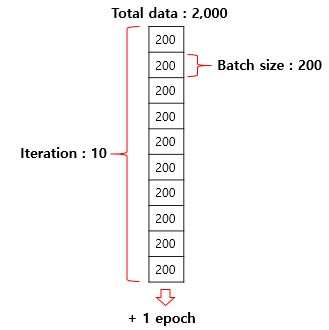

### model.summary() : 모델구현 확인

- layer(type) = 레이어의 이름과 타입, 이름 지정해주려면 파라미터 name=사용
- output shape = 행의 개수는 추가될 수 있어서 None으로 받고 아웃풋의 개수를 의미
- Param = (입력층 + 바이어스(1)) * 아웃풋)
   - (A) = (10 + 1) * 20
   - (B) = (20+1) * 5


In [ ]:
input_shape=(10,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 dense (Dense)               (None, 20)                (A)       
                                                                 
 dense_1 (Dense)             (None, 5)                 (B)                        
=================================================================

### 용어 설명
- **epoch** : 학습 횟수(모든 데이터를 돌아본 횟수)   
- **iteration** : 순전파,역전파에 의해 가중치가 업데이트 된 횟수
- **input_shape(n,)** : 행의 개수를 의미 =(input_dim = n차원을 의미)

